### Simulação do Cenário 2 - Opção 2 - Proposta

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


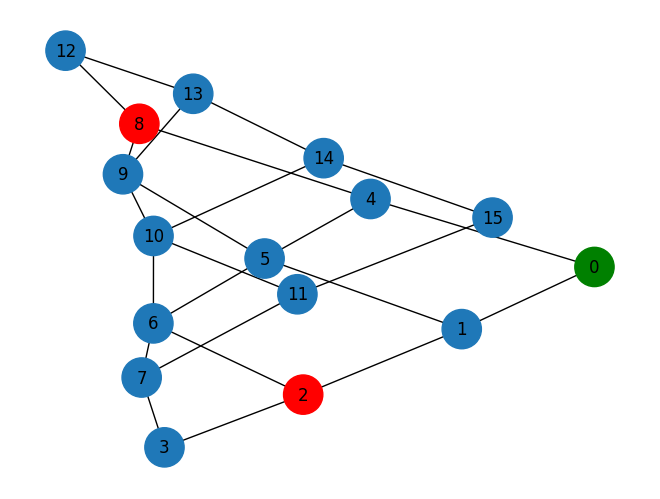

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


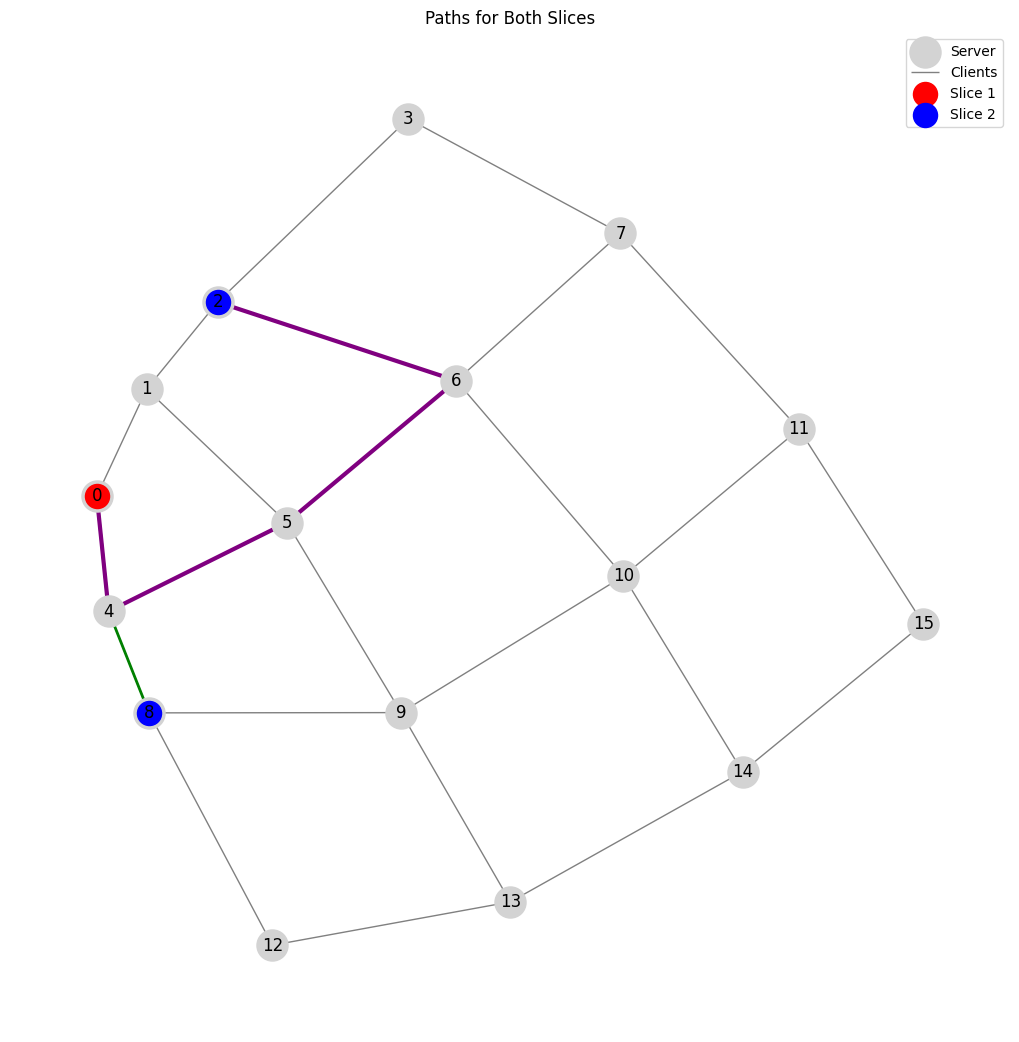

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



### Nessa parte, eu posso gerar minha requesições, com os protocolos: Childs(AC_BQC) e BFK_BQC.

##### O cenário 2 apresenta o agendamento das requesições de forma que pode-se executar uma requesição de cada protocolo, então a cada timeslot pode-se executar até duas requesições.  

In [ ]:
# slice_1_paths = rede.final_slice_1_paths  
# slice_2_paths = rede.final_slice_2_paths  

# controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

# for _ in range(10):
#     protocol = random.choice(["BFK_BQC", "AC_BQC"])  
#     if protocol == "BFK_BQC":
#         alice_id = 8
#         slice_path = rede.final_slice_1_paths[0]  
#     elif protocol == "AC_BQC":
#         alice_id = 2
#         slice_path = rede.final_slice_2_paths[0]  
#     bob_id = 0
#     num_qubits = 10
#     num_gates = 5

#     # Passa o slice_path para garantir a rota correta na requisição
#     rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

# scheduled_timeslots = rede.send_requests_to_controller(controlador)
# slice_paths = controlador.slices  
# rede.execute_scheduled_requests(scheduled_timeslots)


##### Mostra o relatório de execução das requesições.

In [4]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [5]:
slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

controlador.initialize_slices(
    network=rede,
    clients=[8],  
    server=0,      
    protocols=["BFK_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
    slice_1_paths=slice_1_paths,
    slice_2_paths=slice_2_paths
)
for _ in range(10):
    alice_id = 8 
    bob_id = 0     
    num_qubits = random.randint(40, 50)
    num_gates = 20 
    slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

    # Gerar uma única requisição de teste para o protocolo BFK
    rede.generate_request_slice(
        alice_id=alice_id,
        bob_id=bob_id,
        num_qubits=num_qubits,
        num_gates=num_gates,  
        protocol="BFK_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
        slice_path=slice_path,
        scenario= 2 
    )


scheduled_timeslots = rede.send_requests_to_controller(controlador)

rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

2025-01-03 19:15:26,303: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}


                                       
 q_0: ─────────────────────────────────
                                       
 q_1: ─────────────────────────────────
                                       
 q_2: ─────────────────────────────────
                                       
 q_3: ───────────────■─────────────────
           ┌───┐     │                 
 q_4: ─────┤ T ├─────┼─────────────────
           └───┘     │                 
 q_5: ───────────X───┼─────────────────
           ┌───┐ │ ┌─┴─┐               
 q_6: ─────┤ S ├─┼─┤ X ├───────────────
           └───┘ │ └───┘               
 q_7: ───────────┼─────────────────────
                 │                     
 q_8: ───────────┼───X─────────────────
                 │   │  ┌───┐          
 q_9: ───────■───┼───┼──┤ X ├──────────
             │   │   │  └─┬─┘          
q_10: ───────┼───┼───┼────┼────────────
             │   │   │    │            
q_11: ───────┼───┼───┼────┼────────────
             │   │   │    │            


2025-01-03 19:15:26,745: Circuito aleatório gerado com 42 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:26,747: Instrução: {'operation': 'cz', 'qubits': [26, 39]}
2025-01-03 19:15:26,747: Instrução: {'operation': 'cz', 'qubits': [27, 9]}
2025-01-03 19:15:26,749: Instrução: {'operation': 'z', 'qubits': [35]}
2025-01-03 19:15:26,752: Instrução: {'operation': 'cx', 'qubits': [17, 26]}
2025-01-03 19:15:26,753: Instrução: {'operation': 's', 'qubits': [6]}
2025-01-03 19:15:26,756: Instrução: {'operation': 'y', 'qubits': [15]}
2025-01-03 19:15:26,758: Instrução: {'operation': 't', 'qubits': [4]}
2025-01-03 19:15:26,760: Instrução: {'operation': 'h', 'qubits': [20]}
2025-01-03 19:15:26,761: Instrução: {'operation': 'swap', 'qubits': [32, 5]}
2025-01-03 19:15:26,762: Instrução: {'operation': 'swap', 'qubits': [8, 36]}
2025-01-03 19:15:26,763: Instrução: {'operation': 'cx', 'qubits': [26, 40]}
2025-01-03 19:15:26,767: Instrução: {'operation': 'cz', 'qubits': [25, 18]}
2025-01

                             
 q_0: ───────────────────────
                             
 q_1: ───────────────────────
      ┌───┐                  
 q_2: ┤ X ├──────────────────
      └─┬─┘          ┌───┐   
 q_3: ──┼────────────┤ Z ├───
        │            └───┘   
 q_4: ──┼────────────────────
        │                    
 q_5: ──┼────────────────────
        │                    
 q_6: ──┼────────────────────
        │                    
 q_7: ──┼──────────────■─────
        │       ┌───┐  │     
 q_8: ──┼───────┤ X ├──┼─────
        │       └─┬─┘  │     
 q_9: ──┼─────────┼────┼─────
        │         │    │     
q_10: ──┼─────────┼────┼─────
        │  ┌───┐  │    │     
q_11: ──┼──┤ T ├──┼────┼─────
        │  └───┘  │    │     
q_12: ──┼────■────┼────┼─────
        │    │    │    │     
q_13: ──┼────┼────┼────┼─────
        │    │    │    │     
q_14: ──┼────┼────┼────┼─────
        │    │    │    │     
q_15: ──┼────┼────┼────■─────
        │    │    │          
q_16: ──┼─

2025-01-03 19:15:27,115: Circuito aleatório gerado com 47 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:27,126: Instrução: {'operation': 'cx', 'qubits': [18, 2]}
2025-01-03 19:15:27,132: Instrução: {'operation': 'cz', 'qubits': [12, 20]}
2025-01-03 19:15:27,134: Instrução: {'operation': 's', 'qubits': [25]}
2025-01-03 19:15:27,135: Instrução: {'operation': 'swap', 'qubits': [22, 35]}
2025-01-03 19:15:27,136: Instrução: {'operation': 's', 'qubits': [39]}
2025-01-03 19:15:27,138: Instrução: {'operation': 't', 'qubits': [11]}
2025-01-03 19:15:27,139: Instrução: {'operation': 'y', 'qubits': [27]}
2025-01-03 19:15:27,140: Instrução: {'operation': 'cz', 'qubits': [38, 32]}
2025-01-03 19:15:27,141: Instrução: {'operation': 'y', 'qubits': [37]}
2025-01-03 19:15:27,144: Instrução: {'operation': 'x', 'qubits': [37]}
2025-01-03 19:15:27,145: Instrução: {'operation': 'x', 'qubits': [30]}
2025-01-03 19:15:27,146: Instrução: {'operation': 'cx', 'qubits': [17, 8]}
2025-01-03 19:15

      ┌───┐┌───┐                
 q_0: ┤ Z ├┤ X ├────────────────
      └───┘└───┘                
 q_1: ──────────────────────────
                                
 q_2: ──────────────────────────
                                
 q_3: ──────────────────────────
           ┌───┐                
 q_4: ─────┤ X ├────────────────
           └───┘                
 q_5: ──────────────────────────
                                
 q_6: ──────────────────────────
                                
 q_7: ──────────────────────────
                                
 q_8: ──────────────────────────
                                
 q_9: ──────────────────────────
                                
q_10: ────────────X─────────────
                  │             
q_11: ───────■────┼───────────■─
             │    │           │ 
q_12: ───────┼────┼───────────┼─
             │    │           │ 
q_13: ───────┼────┼───────────┼─
             │    │           │ 
q_14: ───────┼────┼───────────┼─
      ┌───

2025-01-03 19:15:27,569: Circuito aleatório gerado com 44 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:27,571: Instrução: {'operation': 'z', 'qubits': [23]}
2025-01-03 19:15:27,572: Instrução: {'operation': 'y', 'qubits': [18]}
2025-01-03 19:15:27,574: Instrução: {'operation': 'x', 'qubits': [17]}
2025-01-03 19:15:27,575: Instrução: {'operation': 'x', 'qubits': [29]}
2025-01-03 19:15:27,577: Instrução: {'operation': 'z', 'qubits': [0]}
2025-01-03 19:15:27,580: Instrução: {'operation': 'cz', 'qubits': [34, 39]}
2025-01-03 19:15:27,584: Instrução: {'operation': 'h', 'qubits': [15]}
2025-01-03 19:15:27,589: Instrução: {'operation': 'swap', 'qubits': [20, 22]}
2025-01-03 19:15:27,591: Instrução: {'operation': 'cx', 'qubits': [11, 21]}
2025-01-03 19:15:27,598: Instrução: {'operation': 'x', 'qubits': [34]}
2025-01-03 19:15:27,613: Instrução: {'operation': 'h', 'qubits': [23]}
2025-01-03 19:15:27,615: Instrução: {'operation': 'x', 'qubits': [4]}
2025-01-03 19:15:27,616: I

                                             
 q_0: ───────────────────────────────────────
      ┌───┐                                  
 q_1: ┤ H ├──────────────────────────────────
      └───┘                                  
 q_2: ────────────────────────X──────────────
                   ┌───┐      │         ┌───┐
 q_3: ─────────────┤ Z ├──────┼───────■─┤ Z ├
                   └───┘┌───┐ │       │ └───┘
 q_4: ──────────────────┤ Y ├─┼───────┼──────
                   ┌───┐└───┘ │       │      
 q_5: ─────────────┤ S ├──────┼───────┼──────
                   └───┘┌───┐ │       │      
 q_6: ──────────────────┤ Z ├─┼───────┼───■──
                        └───┘ │       │   │  
 q_7: ────────────────────────┼───────┼───┼──
                              │       │   │  
 q_8: ────────────────────────┼───────┼───┼──
                              │ ┌───┐ │ ┌─┴─┐
 q_9: ────────────────────────┼─┤ X ├─┼─┤ X ├
                              │ └─┬─┘ │ └───┘
q_10: ────────────────────────┼───

2025-01-03 19:15:27,866: Circuito aleatório gerado com 40 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:27,870: Instrução: {'operation': 'cx', 'qubits': [24, 15]}
2025-01-03 19:15:27,873: Instrução: {'operation': 'h', 'qubits': [1]}
2025-01-03 19:15:27,875: Instrução: {'operation': 'cz', 'qubits': [22, 12]}
2025-01-03 19:15:27,876: Instrução: {'operation': 'swap', 'qubits': [15, 2]}
2025-01-03 19:15:27,877: Instrução: {'operation': 'cx', 'qubits': [25, 13]}
2025-01-03 19:15:27,878: Instrução: {'operation': 'cx', 'qubits': [24, 9]}
2025-01-03 19:15:27,879: Instrução: {'operation': 'x', 'qubits': [21]}
2025-01-03 19:15:27,879: Instrução: {'operation': 't', 'qubits': [23]}
2025-01-03 19:15:27,880: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-03 19:15:27,882: Instrução: {'operation': 's', 'qubits': [5]}
2025-01-03 19:15:27,884: Instrução: {'operation': 'swap', 'qubits': [35, 20]}
2025-01-03 19:15:27,885: Instrução: {'operation': 'cz', 'qubits': [3, 10]}
2025-01-

           ┌───┐               
 q_0: ──X──┤ H ├───────────────
        │  └───┘               
 q_1: ──┼──────────────────────
        │            ┌───┐     
 q_2: ──┼────────────┤ S ├─────
        │            ├───┤     
 q_3: ──┼────────────┤ Y ├─────
        │            └───┘     
 q_4: ──┼──────────────────────
        │            ┌───┐     
 q_5: ──┼────────────┤ H ├──■──
        │            └───┘  │  
 q_6: ──┼───────────────────■──
        │                      
 q_7: ──┼──────────────────────
        │                      
 q_8: ──┼────■──────────────■──
        │    │              │  
 q_9: ──┼────┼─────────■────┼──
        │    │         │    │  
q_10: ──┼────┼─────────┼────┼──
        │    │         │    │  
q_11: ──┼────┼─────────┼────┼──
        │    │         │    │  
q_12: ──┼────┼─────────┼────┼──
        │    │         │    │  
q_13: ──┼────┼─────────┼────┼──
        │    │  ┌───┐  │    │  
q_14: ──┼────┼──┤ H ├──┼────┼──
        │    │  └───┘  │    │  
q_15: ──

2025-01-03 19:15:28,338: Circuito aleatório gerado com 48 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:28,340: Instrução: {'operation': 's', 'qubits': [30]}
2025-01-03 19:15:28,341: Instrução: {'operation': 'cx', 'qubits': [16, 11]}
2025-01-03 19:15:28,341: Instrução: {'operation': 'cx', 'qubits': [16, 47]}
2025-01-03 19:15:28,343: Instrução: {'operation': 'h', 'qubits': [46]}
2025-01-03 19:15:28,344: Instrução: {'operation': 'cx', 'qubits': [23, 7]}
2025-01-03 19:15:28,345: Instrução: {'operation': 'h', 'qubits': [39]}
2025-01-03 19:15:28,346: Instrução: {'operation': 'swap', 'qubits': [20, 45]}
2025-01-03 19:15:28,346: Instrução: {'operation': 'cz', 'qubits': [19, 44]}
2025-01-03 19:15:28,347: Instrução: {'operation': 'z', 'qubits': [9]}
2025-01-03 19:15:28,350: Instrução: {'operation': 'swap', 'qubits': [6, 31]}
2025-01-03 19:15:28,350: Instrução: {'operation': 'swap', 'qubits': [4, 42]}
2025-01-03 19:15:28,373: Instrução: {'operation': 'swap', 'qubits': [5, 33]

                                                   
 q_0: ─────────────────────────────────────────────
                                                   
 q_1: ─────────────────────────────────────────────
                ┌───┐                              
 q_2: ──────────┤ H ├─────────────────■────────────
                └───┘                 │            
 q_3: ────────────────────────────────┼────────────
                                      │            
 q_4: ────────────────────────────────┼────────────
                                      │            
 q_5: ────────────────────────────────┼────────────
                                      │            
 q_6: ────────────────────────────────┼────────────
      ┌───┐                           │            
 q_7: ┤ X ├───────────────────────────┼─────────■──
      └─┬─┘                           │  ┌───┐  │  
 q_8: ──┼─────────────────────────────┼──┤ X ├──■──
        │                             │  └─┬─┘     
 q_9: ──┼───

2025-01-03 19:15:28,996: Circuito aleatório gerado com 47 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:29,000: Instrução: {'operation': 'cx', 'qubits': [22, 7]}
2025-01-03 19:15:29,000: Instrução: {'operation': 'y', 'qubits': [20]}
2025-01-03 19:15:29,002: Instrução: {'operation': 'x', 'qubits': [15]}
2025-01-03 19:15:29,002: Instrução: {'operation': 'cx', 'qubits': [12, 35]}
2025-01-03 19:15:29,003: Instrução: {'operation': 'cz', 'qubits': [36, 32]}
2025-01-03 19:15:29,003: Instrução: {'operation': 'h', 'qubits': [13]}
2025-01-03 19:15:29,004: Instrução: {'operation': 'h', 'qubits': [2]}
2025-01-03 19:15:29,004: Instrução: {'operation': 'y', 'qubits': [23]}
2025-01-03 19:15:29,005: Instrução: {'operation': 'swap', 'qubits': [34, 24]}
2025-01-03 19:15:29,005: Instrução: {'operation': 'cz', 'qubits': [44, 18]}
2025-01-03 19:15:29,005: Instrução: {'operation': 'cx', 'qubits': [10, 20]}
2025-01-03 19:15:29,006: Instrução: {'operation': 'cx', 'qubits': [44, 12]}
2025-0

                                            
 q_0: ─────────────────■────────────────────
                       │                    
 q_1: ───────■─────────┼────────────────────
      ┌───┐  │         │                    
 q_2: ┤ H ├──┼─────────┼────────────────────
      └───┘  │         │                    
 q_3: ───────┼─────────┼────■───────────────
             │         │    │               
 q_4: ───────┼─────────┼────┼───────────────
             │         │    │               
 q_5: ───────┼─────────┼────┼───────────────
             │         │    │               
 q_6: ──■────■─────────┼────┼───────────────
        │  ┌───┐       │    │               
 q_7: ──┼──┤ X ├───────┼────┼───────────────
        │  └───┘       │    │               
 q_8: ──┼──────────────┼────┼───────────────
        │              │    │               
 q_9: ──┼──────────────┼────┼───────────────
        │              │    │               
q_10: ──┼──────────────┼────┼───────────────
        │ 

2025-01-03 19:15:29,827: Circuito aleatório gerado com 47 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:15:29,837: Instrução: {'operation': 'swap', 'qubits': [39, 40]}
2025-01-03 19:15:29,838: Instrução: {'operation': 's', 'qubits': [35]}
2025-01-03 19:15:29,840: Instrução: {'operation': 'cx', 'qubits': [6, 24]}
2025-01-03 19:15:29,841: Instrução: {'operation': 't', 'qubits': [16]}
2025-01-03 19:15:29,841: Instrução: {'operation': 's', 'qubits': [25]}
2025-01-03 19:15:29,842: Instrução: {'operation': 'swap', 'qubits': [19, 11]}
2025-01-03 19:15:29,843: Instrução: {'operation': 'h', 'qubits': [21]}
2025-01-03 19:15:29,844: Instrução: {'operation': 'y', 'qubits': [23]}
2025-01-03 19:15:29,845: Instrução: {'operation': 'y', 'qubits': [29]}
2025-01-03 19:15:29,846: Instrução: {'operation': 'cz', 'qubits': [33, 0]}
2025-01-03 19:15:29,851: Instrução: {'operation': 'y', 'qubits': [19]}
2025-01-03 19:15:29,866: Instrução: {'operation': 'y', 'qubits': [43]}
2025-01-03 19:15:29

                                  
 q_0: ────────────────────────────
                                  
 q_1: ────────────────────────────
      ┌───┐                       
 q_2: ┤ T ├───────────────────────
      └───┘                       
 q_3: ────────────────────────────
      ┌───┐                       
 q_4: ┤ S ├───────────────────────
      └───┘                       
 q_5: ──■───────────────────────X─
        │            ┌───┐      │ 
 q_6: ──┼────────────┤ X ├──────┼─
        │            └─┬─┘      │ 
 q_7: ──┼──────────────┼────────┼─
        │              │  ┌───┐ │ 
 q_8: ──┼──────────────┼──┤ X ├─┼─
        │              │  └─┬─┘ │ 
 q_9: ──┼──────────────┼────┼───┼─
      ┌─┴─┐            │    │   │ 
q_10: ┤ X ├────────────┼────┼───┼─
      └───┘            │    │   │ 
q_11: ─────────────────┼────┼───┼─
                       │    │   │ 
q_12: ─────────────────┼────┼───┼─
                       │    │   │ 
q_13: ───────■─────────┼────┼───┼─
      ┌───┐  │  ┌───

2025-01-03 19:15:30,120: Instrução: {'operation': 't', 'qubits': [18]}
2025-01-03 19:15:30,121: Instrução: {'operation': 'swap', 'qubits': [36, 31]}
2025-01-03 19:15:30,122: Instrução: {'operation': 'cx', 'qubits': [5, 10]}
2025-01-03 19:15:30,123: Instrução: {'operation': 't', 'qubits': [17]}
2025-01-03 19:15:30,124: Instrução: {'operation': 't', 'qubits': [30]}
2025-01-03 19:15:30,124: Instrução: {'operation': 't', 'qubits': [2]}
2025-01-03 19:15:30,125: Instrução: {'operation': 'cz', 'qubits': [13, 27]}
2025-01-03 19:15:30,125: Instrução: {'operation': 'cz', 'qubits': [32, 15]}
2025-01-03 19:15:30,126: Instrução: {'operation': 'cx', 'qubits': [21, 6]}
2025-01-03 19:15:30,126: Instrução: {'operation': 's', 'qubits': [33]}
2025-01-03 19:15:30,127: Instrução: {'operation': 's', 'qubits': [32]}
2025-01-03 19:15:30,127: Instrução: {'operation': 't', 'qubits': [45]}
2025-01-03 19:15:30,128: Instrução: {'operation': 'cx', 'qubits': [38, 8]}
2025-01-03 19:15:30,128: Instrução: {'operation':

                     ┌───┐                   
 q_0: ────────────■──┤ Y ├───────────────────
                  │  └───┘                   
 q_1: ────────────┼──────────────────────────
                  │                          
 q_2: ────────────┼──────────────────────────
                  │                          
 q_3: ────────────┼──────────────────────────
                  │                          
 q_4: ──X─────────┼──────────────────────────
        │         │                          
 q_5: ──┼─────────┼────■───────────X─────────
        │         │    │           │         
 q_6: ──┼─────────┼────┼───────────┼─────────
        │         │    │           │         
 q_7: ──┼─────────┼────┼───────────┼─────────
        │         │    │           │         
 q_8: ──┼─────────┼────┼───────────┼─────────
        │  ┌───┐  │    │  ┌───┐    │         
 q_9: ──┼──┤ H ├──┼────┼──┤ X ├────┼─────────
        │  ├───┤  │    │  └─┬─┘    │         
q_10: ──┼──┤ Y ├──┼────┼────┼─────

2025-01-03 19:15:30,348: Instrução: {'operation': 'cz', 'qubits': [15, 41]}
2025-01-03 19:15:30,349: Instrução: {'operation': 'cz', 'qubits': [16, 0]}
2025-01-03 19:15:30,349: Instrução: {'operation': 'y', 'qubits': [0]}
2025-01-03 19:15:30,350: Instrução: {'operation': 'cz', 'qubits': [26, 5]}
2025-01-03 19:15:30,351: Instrução: {'operation': 't', 'qubits': [39]}
2025-01-03 19:15:30,352: Instrução: {'operation': 'y', 'qubits': [10]}
2025-01-03 19:15:30,353: Instrução: {'operation': 'cz', 'qubits': [39, 27]}
2025-01-03 19:15:30,354: Instrução: {'operation': 'cx', 'qubits': [27, 38]}
2025-01-03 19:15:30,354: Instrução: {'operation': 'z', 'qubits': [30]}
2025-01-03 19:15:30,355: Instrução: {'operation': 'h', 'qubits': [9]}
2025-01-03 19:15:30,355: Instrução: {'operation': 'swap', 'qubits': [11, 39]}
2025-01-03 19:15:30,356: Instrução: {'operation': 'swap', 'qubits': [20, 5]}
2025-01-03 19:15:30,356: Instrução: {'operation': 'cx', 'qubits': [19, 9]}
2025-01-03 19:15:30,357: Instrução: {'o

Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionados
Hosts inicializados
Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:30,561: Qubit 235 criado com fidelidade inicial 0.9589581028607337 e adicionado à memória do Host 8.
2025-01-03 19:15:30,562: Qubit 236 adicionado à memória do Host 8.
2025-01-03 19:15:30,563: Qubit 236 criado com fidelidade inicial 0.9516370844738294 e adicionado à memória do Host 8.
2025-01-03 19:15:30,563: Qubit 237 adicionado à memória do Host 8.
2025-01-03 19:15:30,564: Qubit 237 criado com fidelidade inicial 0.995164392808742 e adicionado à memória do Host 8.
2025-01-03 19:15:30,565: Qubit 238 adicionado à memória do Host 8.
2025-01-03 19:15:30,565: Qubit 238 criado com fidelidade inicial 0.9757259479883299 e adicionado à memória do Host 8.
2025-01-03 19:15:30,566: Timeslot 20 Usando a rota fornecida: [8, 4, 0]
2025-01-03 19:15:30,566: Timeslot 20 Iniciando criação de pares EPRs para o Cenário 2.
2025-01-03 19:15:30,566: Par EPR <quantumnet.objects.epr.Epr object at 0x7fe529421890> adicionado ao canal (8, 4).
2025-01-03 19:15:30,567: Par EPR <quantumnet.objects.e

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:30,853: Timeslot 52 EPR consumido no segmento 4 -> 0 com fidelidade 0.9276.
2025-01-03 19:15:30,854: Timeslot 53 Fidelidade final do teletransporte: 0.8397
2025-01-03 19:15:30,855: Timeslot 53 Fidelidade final 0.84 abaixo de 0.85. Interrompendo transmissão.
2025-01-03 19:15:30,855: Timeslot 53 Foram utilizados 32 pares EPRs ao longo da transmissão.
2025-01-03 19:15:30,856: Pares EPRs restantes na rota:
2025-01-03 19:15:30,856: Timeslot 53 Segmento 8 -> 4: 28 pares EPRs restantes.
2025-01-03 19:15:30,867: Timeslot 53 Segmento 4 -> 0: 28 pares EPRs restantes.
2025-01-03 19:15:30,869: Timeslot 53 Transmissão falhou. Apenas 15 qubits foram transmitidos com sucesso.
2025-01-03 19:15:30,870: Falha registrada: {'alice_id': 8, 'bob_id': 0, 'num_qubits': 44, 'route': [8, 4, 0]}
2025-01-03 19:15:30,870: Falha ao transmitir qubits do cliente 8 para o servidor 0.
2025-01-03 19:15:30,871: Falha ao executar requisição: {'alice_id': 8, 'bob_id': 0, 'num_qubits': 44, 'quantum_circuit'

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:31,075: Timeslot 69 EPR consumido no segmento 8 -> 4 com fidelidade 0.9322.
2025-01-03 19:15:31,075: Timeslot 69 EPR consumido no segmento 4 -> 0 com fidelidade 0.9322.
2025-01-03 19:15:31,076: Timeslot 70 Fidelidade final do teletransporte: 0.9173
2025-01-03 19:15:31,077: Timeslot 70 EPR consumido no segmento 8 -> 4 com fidelidade 0.9276.
2025-01-03 19:15:31,077: Timeslot 70 EPR consumido no segmento 4 -> 0 com fidelidade 0.9276.
2025-01-03 19:15:31,078: Timeslot 71 Fidelidade final do teletransporte: 0.9158
2025-01-03 19:15:31,079: Timeslot 71 EPR consumido no segmento 8 -> 4 com fidelidade 0.9229.
2025-01-03 19:15:31,079: Timeslot 71 EPR consumido no segmento 4 -> 0 com fidelidade 0.9229.
2025-01-03 19:15:31,080: Timeslot 72 Fidelidade final do teletransporte: 0.8549
2025-01-03 19:15:31,081: Timeslot 72 EPR consumido no segmento 8 -> 4 com fidelidade 0.9183.
2025-01-03 19:15:31,081: Timeslot 72 EPR consumido no segmento 4 -> 0 com fidelidade 0.9183.
2025-01-03 19:15

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:31,298: Timeslot 78 Fidelidade final do teletransporte: 0.9462
2025-01-03 19:15:31,299: Timeslot 78 EPR consumido no segmento 8 -> 4 com fidelidade 0.9900.
2025-01-03 19:15:31,299: Timeslot 78 EPR consumido no segmento 4 -> 0 com fidelidade 0.9900.
2025-01-03 19:15:31,302: Timeslot 79 Fidelidade final do teletransporte: 0.9227
2025-01-03 19:15:31,306: Timeslot 79 EPR consumido no segmento 8 -> 4 com fidelidade 0.9851.
2025-01-03 19:15:31,307: Timeslot 79 EPR consumido no segmento 4 -> 0 com fidelidade 0.9851.
2025-01-03 19:15:31,311: Timeslot 80 Fidelidade final do teletransporte: 0.9506
2025-01-03 19:15:31,317: Timeslot 80 EPR consumido no segmento 8 -> 4 com fidelidade 0.9801.
2025-01-03 19:15:31,318: Timeslot 80 EPR consumido no segmento 4 -> 0 com fidelidade 0.9801.
2025-01-03 19:15:31,319: Timeslot 81 Fidelidade final do teletransporte: 0.9645
2025-01-03 19:15:31,320: Timeslot 81 EPR consumido no segmento 8 -> 4 com fidelidade 0.9752.
2025-01-03 19:15:31,321: Time

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:31,615: Qubit 700 adicionado à memória do Host 8.
2025-01-03 19:15:31,616: Qubit 700 criado com fidelidade inicial 0.9798241057264837 e adicionado à memória do Host 8.
2025-01-03 19:15:31,618: Qubit 701 adicionado à memória do Host 8.
2025-01-03 19:15:31,619: Qubit 701 criado com fidelidade inicial 0.9799347136560943 e adicionado à memória do Host 8.
2025-01-03 19:15:31,620: Qubit 702 adicionado à memória do Host 8.
2025-01-03 19:15:31,621: Qubit 702 criado com fidelidade inicial 0.9898468514036686 e adicionado à memória do Host 8.
2025-01-03 19:15:31,622: Qubit 703 adicionado à memória do Host 8.
2025-01-03 19:15:31,623: Qubit 703 criado com fidelidade inicial 0.977836148618667 e adicionado à memória do Host 8.
2025-01-03 19:15:31,623: Qubit 704 adicionado à memória do Host 8.
2025-01-03 19:15:31,624: Qubit 704 criado com fidelidade inicial 0.9990026321389484 e adicionado à memória do Host 8.
2025-01-03 19:15:31,625: Qubit 705 adicionado à memória do Host 8.
2025-01-0

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:32,879: Qubit 711 preparado pelo cliente 8.
2025-01-03 19:15:32,880: Qubit 913 preparado pelo cliente 8.
2025-01-03 19:15:32,880: Qubit 348 preparado pelo cliente 8.
2025-01-03 19:15:32,884: Qubit 753 preparado pelo cliente 8.
2025-01-03 19:15:32,884: Qubit 373 preparado pelo cliente 8.
2025-01-03 19:15:32,888: Qubit 533 preparado pelo cliente 8.
2025-01-03 19:15:32,889: Qubit 812 preparado pelo cliente 8.
2025-01-03 19:15:32,890: Qubit 18 preparado pelo cliente 8.
2025-01-03 19:15:32,890: Qubit 225 preparado pelo cliente 8.
2025-01-03 19:15:32,897: Qubit 997 preparado pelo cliente 8.
2025-01-03 19:15:32,898: Qubit 305 preparado pelo cliente 8.
2025-01-03 19:15:32,898: Qubit 585 preparado pelo cliente 8.
2025-01-03 19:15:32,899: Qubit 61 preparado pelo cliente 8.
2025-01-03 19:15:32,899: Qubit 374 preparado pelo cliente 8.
2025-01-03 19:15:32,900: Qubit 283 preparado pelo cliente 8.
2025-01-03 19:15:32,900: Qubit 38 preparado pelo cliente 8.
2025-01-03 19:15:32,901: Qu

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:33,322: Timeslot 135 EPR consumido no segmento 4 -> 0 com fidelidade 0.9900.
2025-01-03 19:15:33,325: Timeslot 136 Fidelidade final do teletransporte: 0.9534
2025-01-03 19:15:33,337: Timeslot 136 EPR consumido no segmento 8 -> 4 com fidelidade 0.9851.
2025-01-03 19:15:33,338: Timeslot 136 EPR consumido no segmento 4 -> 0 com fidelidade 0.9851.
2025-01-03 19:15:33,340: Timeslot 137 Fidelidade final do teletransporte: 0.9499
2025-01-03 19:15:33,340: Timeslot 137 EPR consumido no segmento 8 -> 4 com fidelidade 0.9801.
2025-01-03 19:15:33,340: Timeslot 137 EPR consumido no segmento 4 -> 0 com fidelidade 0.9801.
2025-01-03 19:15:33,342: Timeslot 138 Fidelidade final do teletransporte: 0.8844
2025-01-03 19:15:33,342: Timeslot 138 EPR consumido no segmento 8 -> 4 com fidelidade 0.9752.
2025-01-03 19:15:33,343: Timeslot 138 EPR consumido no segmento 4 -> 0 com fidelidade 0.9752.
2025-01-03 19:15:33,344: Timeslot 139 Fidelidade final do teletransporte: 0.9054
2025-01-03 19:15:3

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:33,628: Timeslot 171 EPR consumido no segmento 8 -> 4 com fidelidade 0.9183.
2025-01-03 19:15:33,629: Timeslot 171 EPR consumido no segmento 4 -> 0 com fidelidade 0.9183.
2025-01-03 19:15:33,630: Timeslot 172 Fidelidade final do teletransporte: 0.8630
2025-01-03 19:15:33,635: Timeslot 172 EPR consumido no segmento 8 -> 4 com fidelidade 0.9137.
2025-01-03 19:15:33,635: Timeslot 172 EPR consumido no segmento 4 -> 0 com fidelidade 0.9137.
2025-01-03 19:15:33,637: Timeslot 173 Fidelidade final do teletransporte: 0.8213
2025-01-03 19:15:33,638: Timeslot 173 Fidelidade final 0.82 abaixo de 0.85. Interrompendo transmissão.
2025-01-03 19:15:33,638: Timeslot 173 Foram utilizados 38 pares EPRs ao longo da transmissão.
2025-01-03 19:15:33,638: Pares EPRs restantes na rota:
2025-01-03 19:15:33,639: Timeslot 173 Segmento 8 -> 4: 27 pares EPRs restantes.
2025-01-03 19:15:33,639: Timeslot 173 Segmento 4 -> 0: 27 pares EPRs restantes.
2025-01-03 19:15:33,640: Timeslot 173 Transmissão 

Pares EPRs adicionados
Hosts inicializados


2025-01-03 19:15:33,861: Qubit 68 preparado pelo cliente 8.
2025-01-03 19:15:33,863: Qubit 103 preparado pelo cliente 8.
2025-01-03 19:15:33,866: Qubit 224 preparado pelo cliente 8.
2025-01-03 19:15:33,877: Qubit 501 preparado pelo cliente 8.
2025-01-03 19:15:33,881: Qubit 255 preparado pelo cliente 8.
2025-01-03 19:15:33,890: Qubit 748 preparado pelo cliente 8.
2025-01-03 19:15:33,902: Qubit 144 preparado pelo cliente 8.
2025-01-03 19:15:33,910: Qubit 76 preparado pelo cliente 8.
2025-01-03 19:15:33,913: Qubit 938 preparado pelo cliente 8.
2025-01-03 19:15:33,919: Qubit 396 preparado pelo cliente 8.
2025-01-03 19:15:33,921: Qubit 589 preparado pelo cliente 8.
2025-01-03 19:15:33,923: Qubit 905 preparado pelo cliente 8.
2025-01-03 19:15:33,930: Qubit 415 preparado pelo cliente 8.
2025-01-03 19:15:33,936: Qubit 776 preparado pelo cliente 8.
2025-01-03 19:15:33,937: Qubit 44 preparado pelo cliente 8.
2025-01-03 19:15:33,941: Qubit 592 preparado pelo cliente 8.
2025-01-03 19:15:33,952: Us


=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 42, Slice Path: [8, 4, 0], Status: falhou

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 47, Slice Path: [8, 4, 0], Status: falhou

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 44, Slice Path: [8, 4, 0], Status: falhou

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 40, Slice Path: [8, 4, 0], Status: falhou

Timeslot 5:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 46, Slice Path: [8, 4, 0], Status: falhou

Timeslot 6:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 48, Slice Path: [8, 4, 0], Status: falhou

Timeslot 7:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 47, Slice Path: [8, 4, 0], Status: falhou

Timeslot 8:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 47, Slice Path: [8, 4, 0], St

{'success_count': 0, 'failure_count': 10}

In [6]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [7]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["AC_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(10):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = 30
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="AC_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)

##### Mostra o relatório de execução das requesições.

In [8]:
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)



=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 42, Slice Path: [8, 4, 0], Status: falhou

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 47, Slice Path: [8, 4, 0], Status: falhou

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 44, Slice Path: [8, 4, 0], Status: falhou

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 40, Slice Path: [8, 4, 0], Status: falhou

Timeslot 5:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 46, Slice Path: [8, 4, 0], Status: falhou

Timeslot 6:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 48, Slice Path: [8, 4, 0], Status: falhou

Timeslot 7:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 47, Slice Path: [8, 4, 0], Status: falhou

Timeslot 8:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 47, Slice Path: [8, 4, 0], St

{'success_count': 0, 'failure_count': 10}

##### Contabiliza quantos EPRs foram usados e criados.

In [9]:
rede.get_total_useds_eprs()

2025-01-03 19:15:35,542: Eprs usados na camada LinkLayer: 0
2025-01-03 19:15:35,543: Eprs usados na camada NetworkLayer: 0
2025-01-03 19:15:35,544: Eprs usados na camada ApplicationLayer: 348


348

##### Mostra a fidelidade das rotas utilizadas.

In [10]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9133


0.9132690310340155

In [11]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9376
0.9611
0.9334
0.9425
0.8877
0.9236
0.8740
0.9589
0.9258
0.9055
0.8583
0.9312
0.9258
0.9167
0.9437
0.9502
0.8975
0.9486
0.9392
0.9198
0.9599
0.9470
0.8884
0.8678
0.9038
0.8899
0.8663
0.8901
0.9253
0.9174
0.9471
0.9289
0.9557
0.9391
0.9373
0.9179
0.9182
0.8771
0.8606
0.8933
0.8768
0.9128
0.8655
0.9458
0.8997
0.9797
0.9543
0.8940
0.9564
0.9650
0.8947
0.9289
0.9103
0.9265
0.9384
0.8971
0.8705
0.9173
0.9158
0.8549
0.8692
0.9306
0.9462
0.9227
0.9506
0.9645
0.8817
0.8758
0.9413
0.9196
0.9426
0.8933
0.9374
0.9056
0.9196
0.9023
0.8512
0.9572
0.9737
0.9463
0.9369
0.8980
0.9224
0.9229
0.9606
0.9555
0.9374
0.9340
0.9261
0.9219
0.9309
0.9075
0.9240
0.9695
0.9262
0.9482
0.9167
0.9445
0.9569
0.8913
0.8674
0.8653
0.8784
0.8815
0.8756
0.9235
0.9180
0.8577
0.8806
0.9014
0.9224
0.9534
0.9499
0.8844
0.9054
0.8978
0.8994
0.9179
0.8658
0.8670
0.9059
0.9076
0.8767
0.8561
0.8703
0.8763
0.8673
0.9055
0.8933
0.8903
0.8836
0.9315
0.8750
0.9189
0.9375
0.9461
0.9179
0.9193
